# Advanced Regression Models

## Generalized Linear Models (GLM)

In multiple regression models, we specify that

$$
\boldsymbol{Y} = \boldsymbol{X\beta + \epsilon}
$$
$$
\boldsymbol{E(\epsilon)} = \boldsymbol{0} \ \ \ \ \ \ \boldsymbol{\sigma^2\{\epsilon\}} = \sigma^2 \boldsymbol{I}
$$

Essentially, we are constructing a **linear predictor** as $\boldsymbol{\eta}_{N\times 1} = \boldsymbol{X\beta}$, and assumes the dependent variable follows normal distributions $\boldsymbol{Y}\sim \boldsymbol{N(\eta, \sigma^2 I)}$. 

But as we have seen in many dataset analyses, it is common that the residuals do not follow a normal distribution or have constant variance. In some cases, they are even categorical instead of numerical. 

In these cases, we can not rely on multiple regression, but need to generalize our linear models to include more types of distributions. 

## Logistic Regression Use Case

The first example is when we have dependent variables as dummy coded variables as Yes (1) or No (0).

Ex. 
1. Who is going to win 2028 election?
2. Whether or not people will be persuaded (e.g. take vaccine)?
3. Will people click the headline?

When the dependent variable is a **dummy variable** or **empirical probability of success**, we can use a **logistic regression model**.

## Logistic Regression specification

A logistic regression, similar to ordinary regression, has a **linear predictor** as $\boldsymbol{\eta}_{N\times 1} = \boldsymbol{X\beta}$.

But different from ordinary regression, it does not limit the expected value of the dependent variable of the samples to be the linear predictor.

Instead, it specifies a **link function**, which specifies that the linear predictor is the logit of the dependent variable. In another way, it specifies that the dependent variable is the inverse logit function of the linear predictor.

$$
logit(\boldsymbol{Y}) = \boldsymbol{\eta} = \boldsymbol{X\beta}
$$
$$
\boldsymbol{Y} = logit^{-1}(\boldsymbol{\eta})
$$

Where the logit function is 

$$
logit(p) = ln(\frac{p}{1-p})
$$


## Logistic Regression specification
Taken together, the logistic regression can be written as 

$$
ln(\frac{Y_i}{1-Y_i}) = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i, 2} + ... + \beta_{p-1}X_{i, p-1}
$$
$$
E[Y_i]= \frac{1}{1+\exp^{\beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i, 2} + ... + \beta_{p-1}X_{i, p-1}}}
$$

## Logistic Regression

![logistic](./img/logistic_regression.png)

## Comparing between ordinary regression and logistic regression

In [49]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("./data/framingham.csv")
df = df.dropna()

| Column | Description|
|--------| -----------|
|Sex	|male or female(Nominal)|
|Age	|Age of the patient|
|Current Smoker|whether or not the patient is a current smoker (Nominal)|
|Cigs Per Day | the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)|
|BP Meds | whether or not the patient was on blood pressure medication (Nominal)|
|Prevalent Stroke | whether or not the patient had previously had a stroke (Nominal)|
|Prevalent Hyp | whether or not the patient was hypertensive (Nominal)|
|Diabetes| whether or not the patient had diabetes (Nominal)|
|Tot Chol |	total cholesterol level (Continuous)|
|Sys BP |	diastolic blood pressure (Continuous)|
|BMI |	Body Mass Index (Continuous)|
|Heart Rate |	heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)|
|Glucose |	 glucose level (Continuous)|
| **CHD** |	**10 year risk of coronary heart disease (binary: “1”, means “Yes”, “0” means “No”)**|

In [50]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [51]:
import statsmodels.formula.api as smf

ordinary_regression = smf.ols(formula='TenYearCHD ~ age + male + education + currentSmoker + cigsPerDay' + \
                              '+ BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + BMI' + \
                              '+ heartRate + glucose', data=df)

logistic_regression = smf.logit(formula='TenYearCHD ~ age + male + education + currentSmoker + cigsPerDay' + \
                              '+ BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + BMI' + \
                              '+ heartRate + glucose', data=df)

ordinary_regression_result = ordinary_regression.fit()
logistic_regression_result = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.376724
         Iterations 7


In [59]:
logistic_regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3641
Method:                           MLE   Df Model:                           14
Date:                Wed, 23 Apr 2025   Pseudo R-squ.:                  0.1173
Time:                        01:09:45   Log-Likelihood:                -1377.3
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 1.876e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.4486      0.688    -12.272      0.000      -9.798      -7.099
age                 0.0643      0.007      9.829      0.000       0.052       0.077
male                0.5462      0.108      5.052      0.000       0.334       0.758
education          -0.0499      0.049     -1.013      0.311      -0.146       0.047
currentSmoker       0.0734      0.157      0.469      0.639      -0.234       0.381
cigsPerDay          0.0179      0.006      2.871      0.004       0.006       0.030
BPMeds              0.1664      0.234      0.711      0.477      -0.292       0.625
prevalentStroke     0.6867      0.489      1.404      0.160      -0.272       1.645
prevalentHyp        0.2221      0.137      1.627      0.104      -0.045       0.490
diabetes            0.0448      0.315      0.142      0.887      -0.573       0.663
totChol             0.0023      0.001      2.068      0.039       0.000       0.005
sysBP               0.0138      0.003      4.712      0.000       0.008       0.020
BMI                 0.0050      0.013      0.403      0.687      -0.019       0.030
heartRate          -0.0034      0.004     -0.798      0.425      -0.012       0.005
glucose             0.0072      0.002      3.208      0.001       0.003       0.012
===================================================================================
"""

In [62]:
ordinary_regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             TenYearCHD   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     29.11
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           7.34e-74
Time:                        01:11:57   Log-Likelihood:                -1252.1
No. Observations:                3656   AIC:                             2534.
Df Residuals:                    3641   BIC:                             2627.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6058      0.076     -7.958      0.000      -0.755      -0.457
age                 0.0072      0.001      9.561      0.000       0.006       0.009
male                0.0551      0.012      4.452      0.000       0.031       0.079
education          -0.0061      0.006     -1.078      0.281      -0.017       0.005
currentSmoker       0.0091      0.018      0.499      0.618      -0.027       0.045
cigsPerDay          0.0022      0.001      2.760      0.006       0.001       0.004
BPMeds              0.0475      0.035      1.368      0.171      -0.021       0.115
prevalentStroke     0.1351      0.075      1.792      0.073      -0.013       0.283
prevalentHyp        0.0248      0.017      1.436      0.151      -0.009       0.059
diabetes            0.0268      0.044      0.606      0.545      -0.060       0.113
totChol             0.0001      0.000      0.902      0.367      -0.000       0.000
sysBP               0.0020      0.000      5.279      0.000       0.001       0.003
BMI                -0.0004      0.002     -0.236      0.813      -0.003       0.003
heartRate          -0.0004      0.000     -0.818      0.413      -0.001       0.001
glucose             0.0012      0.000      3.860      0.000       0.001       0.002
==============================================================================
Omnibus:                      999.210   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2044.915
Skew:                           1.668   Prob(JB):                         0.00
Kurtosis:                       4.513   Cond. No.                     4.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='TenYearCHD'>

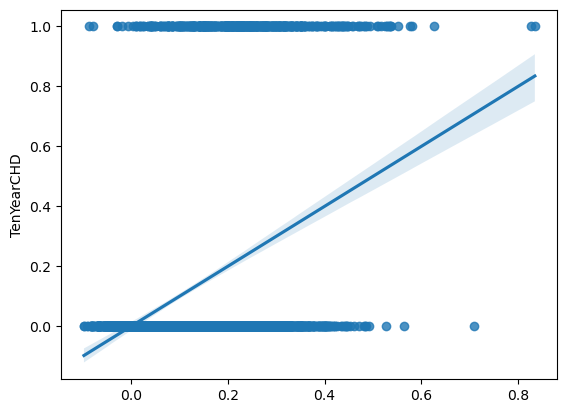

In [53]:
sns.regplot(x=ordinary_regression_result.fittedvalues, y=df["TenYearCHD"])

<Axes: ylabel='TenYearCHD'>

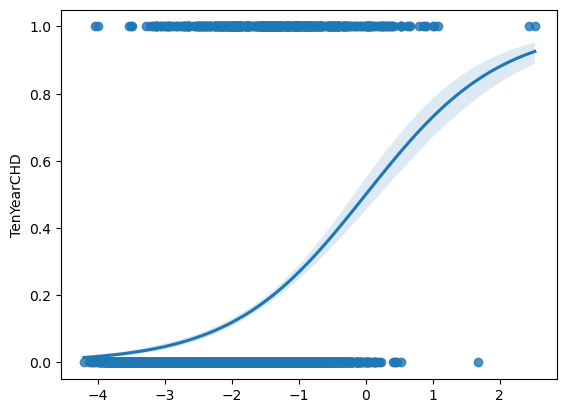

In [56]:
sns.regplot(x=logistic_regression_result.fittedvalues, y=df["TenYearCHD"], logistic=True)

## Generalized Linear Model

If we generalize from ordinary regression and logistic regression, we can specify the distribution of dependent variables more accurately by specifying the **link function** $g$.

$$
\boldsymbol{E[Y]} = g^{-1}(\boldsymbol{X\beta})
$$

Here is a [table](https://en.wikipedia.org/wiki/Generalized_linear_model) showing that which link function you may use for the types of dependent variable. 

<div>
<img src="./img/glm_link.png" width="600"/>
</div>


## Mixed Effect Model

Previously, we have introduced the **independence assumption** of linear regression models. 

Regression models assume that your data samples are collected as $i.i.d$ samples. 

But in real-world practices, our data samples are usually grouped together. 

In these cases, we need to use a mixed effect model, which will specify the group structure of the samples by specifying a random intercept and/or random slopes. 

It will
1. Address issues with the independence assumption.
2. Increase the power of your hypothesis testing.
3. Address potential issues like Simpson's Paradox.
4. But be aware that the mixed effect model will introduce more parameters into your model, which may introduce some other issues like insufficient degrees of freedom. 

![mixed](./img/mixed_effect.jpg)

![mixed](./img/mixed_effect.png)

## Simpson's Paradox

![simpson](./img/simpson.png)

## Practical Guidance

You may ask, if I have a different slope and intercept for each of my group, why not just fit a regression model for each of my group seperately? 

It is usually recommended to fit a mixed effect model rather than multiple independent regression models for each group. 

There are a few reasons:
1. Mixed effect model produce a single model fitting for all of your groups
2. It will have more degree of freedom of your samples.
3. It will make your interepretation easier.
4. It will increase your power to detect the fixed effect because it **shrink** the regression coefficients for each group, because it specifies that the random intercept and random slopes are regulated by higher level distributions. 
 
For a more detailed explanation, I found this [tutorial](https://www.pymc.io/projects/examples/en/latest/generalized_linear_models/multilevel_modeling.html) to be pretty helpful. 

For a tutorial, please follow the tutorial in assignment 5.

## Ridge and LASSO regression
In ordinary regression models, we use the Ordinary Least Squares (OLS) method to estimate the regression coefficients, because the OLS method is unbiased and has the least variance. 

The OLS method is basically to minimize the sum of squared errors.

$$
Q = \sum (Y_i - \beta_0 - \beta_1 X_{i, 1} - \beta_2 X_{i, 2} -... - \beta_{p-1} X_{i, p-1})^2
$$

But one issue with the OLS method is that it relies on the data we give it to fit. And when the size of the independent variables is large, it will overfit and produce bad predictions, because of the bias-variance trade-off.

So, when we have a lot of independent variables, what should we do to counter the model variance issue? 

There are two solutions: **Ridge Regression** and **LASSO Regression**.

## Ridge Regression

We know that the problem of OLS method is that it will have large model variance when we have a lot of independent variables. So to address this problem, Ridge Regression is set to **shrink** the magnitude of the estimated regression coefficients. To do so, it tries to minimize the following cost function.

$$
Q = \sum_{i=1}^N (Y_i - \hat{Y_i})^2 + \lambda \sum_{k=1}^p \hat{\beta_k}^2
$$

This is also called **L-2 regularization**, because we will penalize the model if it has a very large L-2 norm of the regression coefficients.

$$
||\boldsymbol{\hat{\beta}}||^2 = \sum_{k=1}^p \hat{\beta_k}^2
$$

The **hyperparameter** $\lambda$ sets up how much we want to penalize the model to reduce the model variance. In practice, you may need to **tune** this hyperparameter by comparing different $\lambda$ values using evaluation metrics, such as prediction accuracy, leave-one-out-cross-validation, or multi-fold-cross-validation. 

![ridge](./img/ridge.png)

## LASSO Regression

Similarly, LASSO regression is also called L-1 regularization, because it penalize the model if it has a large L-1 norm of the regression coefficient. 

$$
||\boldsymbol{\beta}||^1 = \sum_{k=1}^p |\hat{\beta_k}|
$$

$$
Q = \sum_{i=1}^N (Y_i - \hat{Y_i})^2 + \lambda \sum_{k=1}^p |\hat{\beta_k}|
$$

In general, when we set up LASSO regression, it will help us to shrink some coefficients, usually those that are less important in the regression model, to 0. This property usually helps us to **reduce** the size of our independent variables. 

![lasso](./img/lasso.png)

## Tunning $\lambda$
![tune](./img/tunning.png)

## Difference Between Ridge and LASSO regression


<div>
<img src="./img/diff_ridge_lasso.png" width="600"/>
</div>


## Practical Guidance

These regularization techniques are usually used for **prediction** models. In most of our research, we want to explain the effect in our existing data by testing the **significance of the coefficients**. Thus we usually do not use these approaches, because these techniques will bias our coefficient estimates. 

Sometimes, you may want to use them, when

1. You are trying to make predictions.
2. You have a very large amount of independent variables, and want to reduce the size of your independent variables. You can fit a LASSO regression model first to find the best LASSO model, and find out which variables it reduced, and fit the model again with the survived independent variables. 

## Dynamic Regression Model

When our collected data samples are time series data, we may need to use a dynamic regression model, because 

1. Data samples are usually correlated, also called **Autocorrelation**.
2. It is likely to have **spurious regression** result, which means that the observed effect of independent variables on dependent variables comes from time, seasonality, or autocorrelation.

In order to recover the independence of time series, we need to ensure that our data are **stationary**, meaning that samples' statistical properties, like the mean, variance, and autocorrelation, do not change over time.

![stationary](./img/stationary.png)

In [192]:
data = data = sm.datasets.macrodata.load_pandas().data
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Does Consumption Impact GDP?

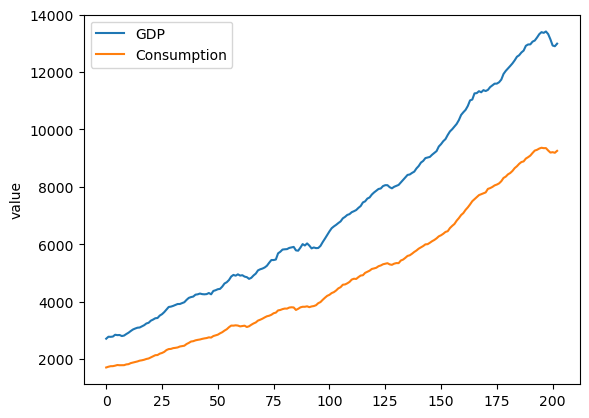

In [193]:
sns.lineplot(data.realgdp, label="GDP")
sns.lineplot(data.realcons, label="Consumption")
plt.ylabel("value")
plt.legend()

## Spurious Regression

<Axes: xlabel='realcons', ylabel='realgdp'>

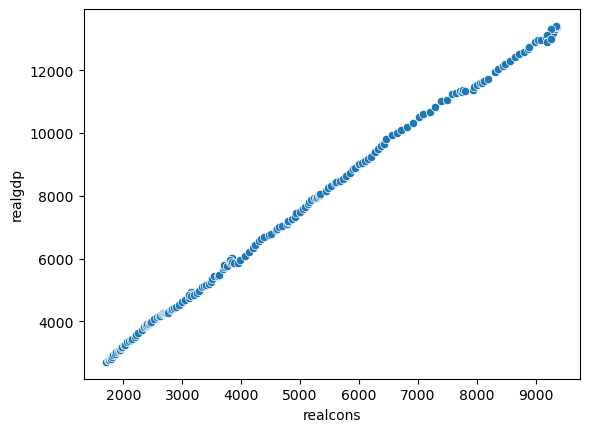

In [194]:
sns.scatterplot(data=data, x="realcons", y="realgdp")

## Autocorrelation

Text(0, 0.5, 'GDP (t)')

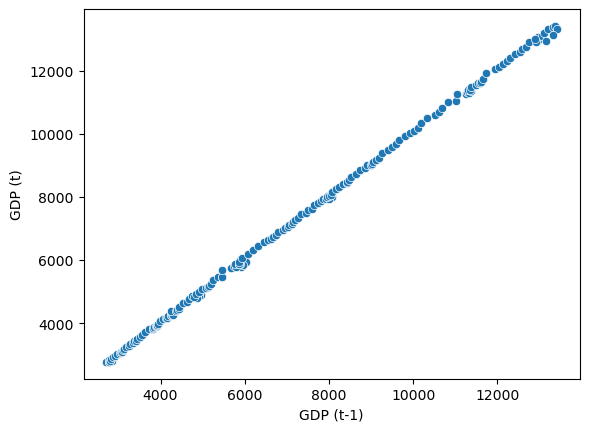

In [195]:
sns.scatterplot(data=data, x=data.realgdp.shift(), y="realgdp")
plt.xlabel("GDP (t-1)")
plt.ylabel("GDP (t)")

## Strategies

Usually when dealing with regression with time series data, we need to 

1. Apply transformation techniques to ensure the variables are stationary.
2. Add time and autoregressive regressors in the model to account for the autocorrelation in the error terms.

## ACF and PACF plots for autoregression with lags

We can use ACF plots to visualize how the samples at time $t$ is correlated with previous data $t-1$, $t-2$, ..., or denoted as $t-k$, where $k$ is the time lag of correlation test between samples. 

Usually, a PACF plot is used to visualize how the sample at $t$ is correlated with the sample at $t-k$, after accounting for the autoregression for samples before $t-k$. 

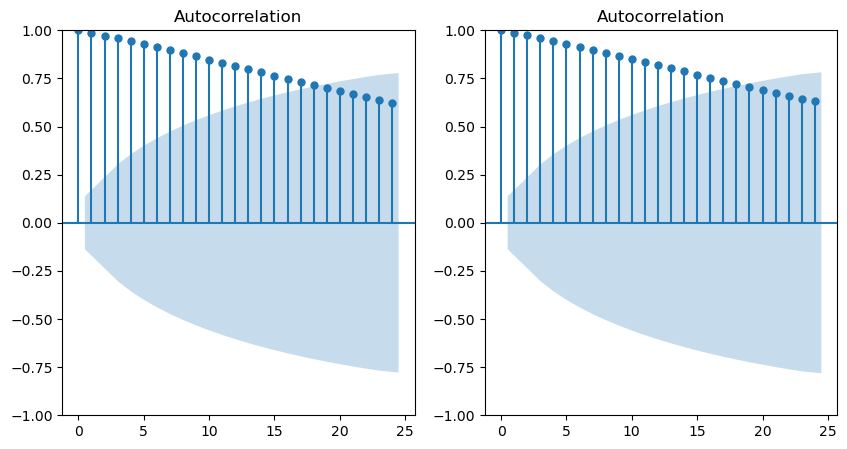

In [197]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
plot_acf(data.realcons, ax=ax[0])
plot_acf(data.realgdp, ax=ax[1])
plt.show()

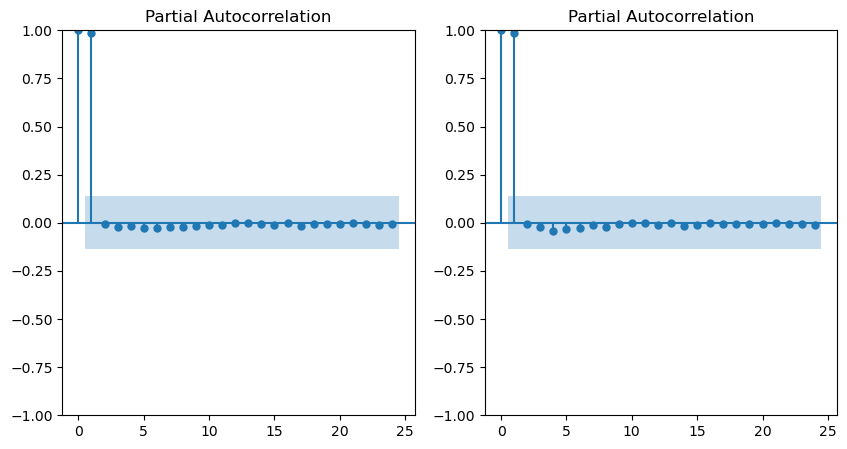

In [198]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
plot_pacf(data.realcons, ax=ax[0])
plot_pacf(data.realgdp, ax=ax[1])
plt.show()

## Stationarity and detrending (ADF/KPSS)

We can also use two statistical tests to test the stationarity of our data samples - Augmented Dickey Fuller (**ADF**) test and Kwiatkowski-Phillips-Schmidt-Shin (**KPSS**) test.

- Case 1: Both tests conclude that the series is not stationary - The series is not stationary
- Case 2: Both tests conclude that the series is stationary - The series is stationary
- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

In [199]:
from statsmodels.tsa.stattools import kpss, adfuller


def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [200]:
adf_test(data.realcons)
kpss_test(data.realcons)

Results of Dickey-Fuller Test:
Test Statistic                   1.549912
p-value                          0.997699
#Lags Used                       4.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
Results of KPSS Test:
Test Statistic           2.050711
p-value                  0.010000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/tmp/ipykernel_3212767/369695744.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


## Differencing time series to restore stationarity

To prepare the data for time series regression analysis, we need to apply a transformation to the data to ensure the data are stationary. 

One commonly used strategy is differencing. This strategy is basically to subtract the data at time $t$ by the data at time $t-1$.

$$
Y_t' = Y_t - Y_{t-1}
$$

In most cases, order one differencing is sufficient to restore the stationarity, but sometimes you might need to use order two differencing 

$$
Y_t'' = Y_t' - Y_{t-1}' = Y_t - 2Y_{t-1} + Y_{t-2}
$$

## Dynamic regression model

To estimate a regression model for time series data, we need to specify a dynamic regression model, where the collected samples are denoted by time 

$$
Y_t = \beta_0 + \beta_1 X_t + \epsilon_t
$$

In order to account for the autocorrelation effects, we need to add additional regressors to account for the time related dependencies in our data. Some commonly added regressors:

1. Trend $t$
2. Autoregressors $Y_{t-1}, Y_{t-2}...$
3. Moving averages regressors
4. Seasonality: Dummy-coded season indicators such as day of week

## Detrend by adding trend variable into the model

A simpler method is to detrend the time series, which involves fitting a trend line, and obtaining the residuals of the trend model as the detrended data samples. 

Or usually, we can normally add a trend regressor into the model to account for the effect of trends. 

$$
Y_t = \beta_0 + \beta_1 t + ... + \epsilon_t
$$

![detrend](./img/detrend.png)

## Autoregressor (AR)

When fitting a regression model with expected autoregression effects, we should add autoregressors in our regression model, denoted as $AR$.

For instance, we can add a regressor by specifying the dependent variable at the previous time $t-1$ as an independent variable in our model. 

$$
Y_t = \beta_0 + \beta_1 Y_{t-1} + \beta_2 X_1 + \epsilon_i
$$

For higher order autoregressors such as $AR(2)$, we may add additional independent variables such as $Y_{t-1}$

$$
Y_t = \beta_0 + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + \beta_3 X_1 + \epsilon_i
$$

## Moving average regressor (MA)

Moving average regressors, different from autoregressors (AR), specify that the dependent variable is correlated with previous random errors, which are not directly observable. 

A moving average model with order $q$ is specified as 

$$
Y_t = \beta_0 + \epsilon_t + \beta_1 \epsilon_{t-1} + \beta_2 \epsilon_{t-2} + ... + \beta_{q} \epsilon_{t-q}
$$

Here $\epsilon_t$ are model errors or white noise at time point $t$. Thus, the $MA$ model uses the model errors of its past data samples to explain its future data samples, which is not unusual than regression models we have learned previously. 

## Dynamic Regression Model with ARIMA model

A dynamic regression model combines these techniques to explain and account for the time dependencies and autocorrelations in our data. 

Such regression models can consist of the following regressors or preprocessing techniques:

- Trend
- Seasonality
- Independent Variables
- First differencing of both dependent variables and independent variables
- Autoregressor of past dependent variables
- Moving average regressors of past model errors

By defining the order of each regressor or technique, we can obtain a dynamic regression model that best describes our data. 

Here is a [practical guide](https://people.duke.edu/~rnau/arimrule.htm) for how to choose these orders. 